In [1]:
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
print(__doc__)

Automatically created module for IPython interactive environment


### SMOTE Data

In [2]:
Data = pd.read_csv('../Data/SMOTE/SMOTE.csv')
X = Data.iloc[:,:-1]
y = Data.iloc[:,-1]
print(y)

0         1
1         0
2         0
3         0
4         0
         ..
504289    1
504290    1
504291    1
504292    1
504293    1
Name: FraudFound, Length: 504294, dtype: int64


In [3]:
print(X.shape,y.shape)

(504294, 98) (504294,)


In [4]:
### n_neighbors = 30
# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    """    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    """
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [ ]:
# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

Computing t-SNE embedding


In [ ]:
X_tsne.head()

In [20]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split #to use sklearn we need data in matrix not in data frame
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size = 0.25, random_state = 0)

In [21]:
# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classification

In [22]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[3366  236]
 [   6 3640]]
Accuracy Score is 0.9666
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97      3602
           1       0.94      1.00      0.97      3646

    accuracy                           0.97      7248
   macro avg       0.97      0.97      0.97      7248
weighted avg       0.97      0.97      0.97      7248

AUC-ROC: 0.9664176024595346
LOGLOSS Value is 1.1532


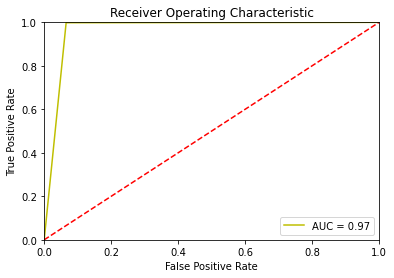

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classification

In [25]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[3375  227]
 [   4 3642]]
Accuracy Score is 0.9681
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      3602
           1       0.94      1.00      0.97      3646

    accuracy                           0.97      7248
   macro avg       0.97      0.97      0.97      7248
weighted avg       0.97      0.97      0.97      7248

AUC-ROC: 0.9679411815767616
LOGLOSS Value is 1.1008


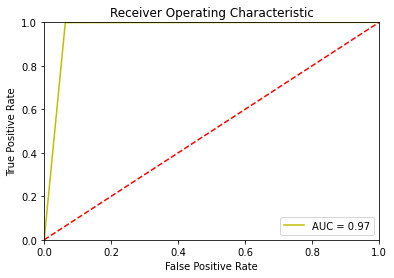

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machine


In [28]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', random_state=0)

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[2164 1438]
 [1444 2202]]
Accuracy Score is 0.6024
Classification Report : 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60      3602
           1       0.60      0.60      0.60      3646

    accuracy                           0.60      7248
   macro avg       0.60      0.60      0.60      7248
weighted avg       0.60      0.60      0.60      7248

AUC-ROC: 0.6023634398272674
LOGLOSS Value is 13.7337


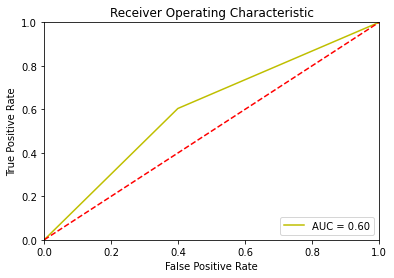

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()